# Name of contributor: Piyush Bhujbal

# Title: Telecom customer churn analysis and prediction

## General information about the dataset:
### The dataset contains information about the customer info regarding the monthly recharge plans, gender, reason to discontinue the service, customers who bought the extra services from the telecom company.

## Advice for improvement of models
### The columns like city are mostly categoical. But, we need some categorical features so the feature etraction and column selection shall be taken into considerations

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
customer_data = pd.read_csv("Datasets/telecom_customer_churn.csv")
customer_data.head()

Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charges  \
0           65.6        593.30           0.00                        0   
1           -4.0        542.40          38.33                       10   
2           73.9        280.85           0.00                        0   
3           98.0       1237.85           0.00                        0   
4           83.9        267.40           0.00                        0   

  Total Long Distance Charges Total Revenue  Customer Status   Churn Category  \
0                      381.51        974.81           Stayed              NaN   
1                       96.21        610.28           Stayed              NaN   
2                      134.60        415.45          Churned       Competitor   
3                      361.66       1599.51          Churned  Dissatisfaction   
4                       22.14        289.54          Churned  Dissatisfaction   

                    Churn Reason  
0                            NaN  
1                            NaN  
2  Competitor had better devices  
3        Product dissatisfaction  
4            Network reliability  

[5 rows x 38 columns]

## Fetching the info of dataset

In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [5]:
customer_data.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [6]:
len(customer_data.columns)

38

In [7]:
customer_data.shape

(7043, 38)

## checking for unique values for several columns

In [8]:
customer_data['Churn Reason'].unique()

array([nan, 'Competitor had better devices', 'Product dissatisfaction',
       'Network reliability', 'Limited range of services',
       'Competitor made better offer', "Don't know",
       'Long distance charges', 'Attitude of service provider',
       'Attitude of support person',
       'Competitor offered higher download speeds',
       'Competitor offered more data',
       'Lack of affordable download/upload speed', 'Deceased', 'Moved',
       'Service dissatisfaction', 'Price too high',
       'Lack of self-service on Website',
       'Poor expertise of online support', 'Extra data charges',
       'Poor expertise of phone support'], dtype=object)

In [9]:
customer_data['City'].unique()

array(['Frazier Park', 'Glendale', 'Costa Mesa', ..., 'Jacumba',
       'Carpinteria', 'Meadow Valley'], dtype=object)

In [10]:
customer_data['City'].value_counts()

Los Angeles         293
San Diego           285
San Jose            112
Sacramento          108
San Francisco       104
                   ... 
Johannesburg          2
South Lake Tahoe      2
Jacumba               2
Holtville             2
Eldridge              2
Name: City, Length: 1106, dtype: int64

In [11]:
customer_data['Payment Method'].unique()

array(['Credit Card', 'Bank Withdrawal', 'Mailed Check'], dtype=object)

In [12]:
customer_data['Churn Category'].unique()

array([nan, 'Competitor', 'Dissatisfaction', 'Other', 'Price', 'Attitude'],
      dtype=object)

In [13]:
customer_data['Tenure in Months'].unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14, 35,
       64, 39, 40, 11,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 31, 36, 17,
       18, 51, 38, 42], dtype=int64)

In [14]:
customer_data['Offer'].unique()

array(['None', 'Offer E', 'Offer D', 'Offer A', 'Offer B', 'Offer C'],
      dtype=object)

In [15]:
customer_data['Phone Service'].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
customer_data['Device Protection Plan'].unique()

array(['No', 'Yes', nan], dtype=object)

In [17]:
customer_data['Online Security'].unique()

array(['No', 'Yes', nan], dtype=object)

In [18]:
customer_data["Total Extra Data Charges"].unique()

array([  0,  10,  20,  40, 120, 100, 130, 110,  60, 140,  50,  80, 150,
        70,  30,  90], dtype=int64)

## Important columns for analysis and prediction 
1. Gender: Males/Females who stopped using the service of the telecom service
2. Age: Age in years of people who discontinued the service
3. Tenure in months: Time period of customers in months with the company.
4. Phone service: Telephone home service availed by the customer from the company.
5. Average monthly long distance charges.
6. Multiple lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No 
7. Internet Service: Indicates if the customer subscribes to Internet service with the company: Yes, No
8. Internet type: Indicates the customer's type of internet connection: DSL, Fiber Optic, Cable.
9. Avg Monthly GB Download: Data downloaded in Gigabytes by the customers.
10. Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No 
11. Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No 
12. Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment.
13. Premium Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No. (True, False, None)
14. Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider. (True, False, None)
15. Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider at no additional fee: Yes, No. 
16. Streaming Music: Indicates if the customer uses their Internet service to stream music from a third party provider at no additional fee: Yes, No.
17. Unlimited Data: Indicates if the customer has paid an additional monthly fee to have unlimited data downloads/uploads: Yes, No.
18. Contract: Indicates the customer's current contract type: Month-to-Month, One Year, Two Year. 
19. Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No
20. Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check.
21. Monthly Charge: Indicates the customer's current total monthly charge for all their services from the company.
22. Total Charges: Indicates the customer's total charges, calculated to the end of the quarter specified above.
23. Total Refunds: Indicates the customer's total refunds, calculated to the end of the quarter specified above.
24. Total Extra Data Charges: Indicates the customer's total charges for extra data downloads above those specified in their plan. 
25. Total Long Distance Charges: Indicates the customer's total charges for long distance above those specified in their plan, by the end of the quarter.
26. Total Revenue: Indicates the company's total revenue from this customer, calculated to the end of the quarter specified above.
27. Customer Status: Indicates the status of the customer at the end of the quarter: Churned, Stayed, or Joined.
28. Churn Category: A high-level category for the customer's reason for churning, which is asked when they leave the company.
29. Churn Reason: A customer's specific reason for leaving the company, which is asked when they leave the company (directly related


## Dropping columns that are useless for analysis
1. Customer ID
2. Zip Code
3. Latitude
4. Longitude
5. Offer

In [19]:
customer_data.rename(lambda x: x.lower().strip().replace(' ', '_'), axis='columns', inplace = True)
customer_data.drop(columns = ['customer_id', 'zip_code', 'latitude', 'longitude', "offer"], inplace = True)

In [20]:
customer_data.head()

gender  age married  number_of_dependents          city  \
0  Female   37     Yes                     0  Frazier Park   
1    Male   46      No                     0      Glendale   
2    Male   50      No                     0    Costa Mesa   
3    Male   78     Yes                     0      Martinez   
4  Female   75     Yes                     0     Camarillo   

   number_of_referrals  tenure_in_months phone_service  \
0                    2                 9           Yes   
1                    0                 9           Yes   
2                    0                 4           Yes   
3                    1                13           Yes   
4                    3                 3           Yes   

   avg_monthly_long_distance_charges multiple_lines  ...   payment_method  \
0                              42.39             No  ...      Credit Card   
1                              10.69            Yes  ...      Credit Card   
2                              33.65             No  ...  Bank Withdrawal   
3                              27.82             No  ...  Bank Withdrawal   
4                               7.38             No  ...      Credit Card   

  monthly_charge  total_charges total_refunds total_extra_data_charges  \
0           65.6         593.30          0.00                        0   
1           -4.0         542.40         38.33                       10   
2           73.9         280.85          0.00                        0   
3           98.0        1237.85          0.00                        0   
4           83.9         267.40          0.00                        0   

  total_long_distance_charges total_revenue customer_status   churn_category  \
0                      381.51        974.81          Stayed              NaN   
1                       96.21        610.28          Stayed              NaN   
2                      134.60        415.45         Churned       Competitor   
3                      361.66       1599.51         Churned  Dissatisfaction   
4                       22.14        289.54         Churned  Dissatisfaction   

                    churn_reason  
0                            NaN  
1                            NaN  
2  Competitor had better devices  
3        Product dissatisfaction  
4            Network reliability  

[5 rows x 33 columns]

In [21]:
customer_data['customer_status'].unique()

array(['Stayed', 'Churned', 'Joined'], dtype=object)

In [22]:
customer_data.nunique()

gender                                  2
age                                    62
married                                 2
number_of_dependents                   10
city                                 1106
number_of_referrals                    12
tenure_in_months                       72
phone_service                           2
avg_monthly_long_distance_charges    3583
multiple_lines                          2
internet_service                        2
internet_type                           3
avg_monthly_gb_download                49
online_security                         2
online_backup                           2
device_protection_plan                  2
premium_tech_support                    2
streaming_tv                            2
streaming_movies                        2
streaming_music                         2
unlimited_data                          2
contract                                3
paperless_billing                       2
payment_method                    

## Visualization phase

### The visual hist plots for all the columnn in dataframe

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'number_of_dependents'}>,
        <AxesSubplot:title={'center':'number_of_referrals'}>],
       [<AxesSubplot:title={'center':'tenure_in_months'}>,
        <AxesSubplot:title={'center':'avg_monthly_long_distance_charges'}>,
        <AxesSubplot:title={'center':'avg_monthly_gb_download'}>],
       [<AxesSubplot:title={'center':'monthly_charge'}>,
        <AxesSubplot:title={'center':'total_charges'}>,
        <AxesSubplot:title={'center':'total_refunds'}>],
       [<AxesSubplot:title={'center':'total_extra_data_charges'}>,
        <AxesSubplot:title={'center':'total_long_distance_charges'}>,
        <AxesSubplot:title={'center':'total_revenue'}>]], dtype=object)

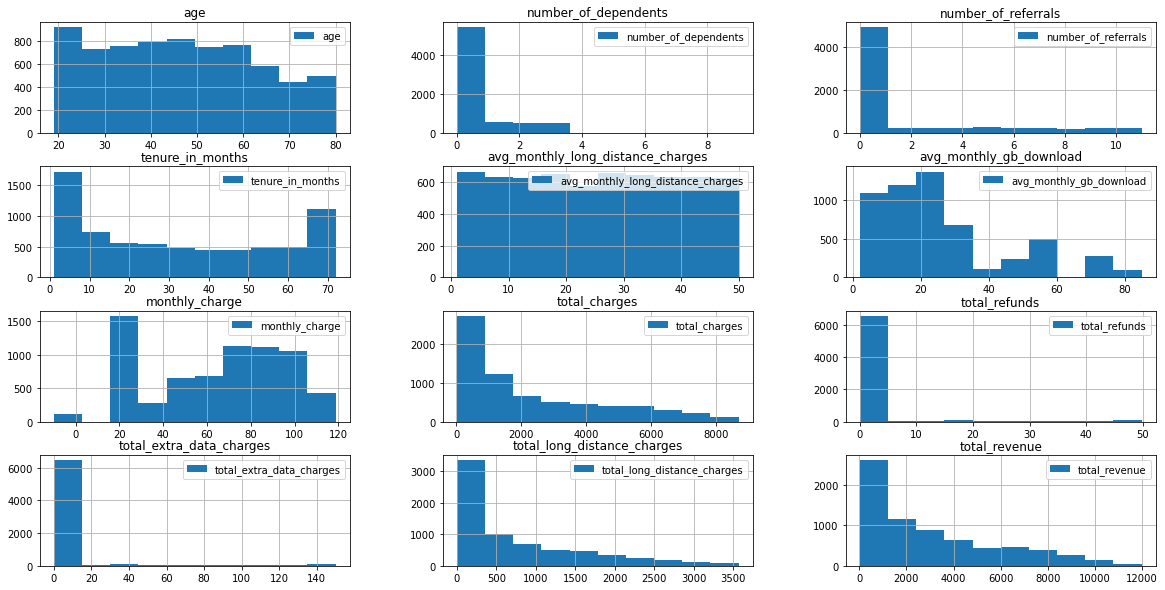

In [23]:
customer_data.hist(figsize = (20, 10), legend = True)

## Total revenue earned per gender analysis (checking the contribution of revenue with respect of male and female customers)

<AxesSubplot:xlabel='gender', ylabel='total_revenue'>

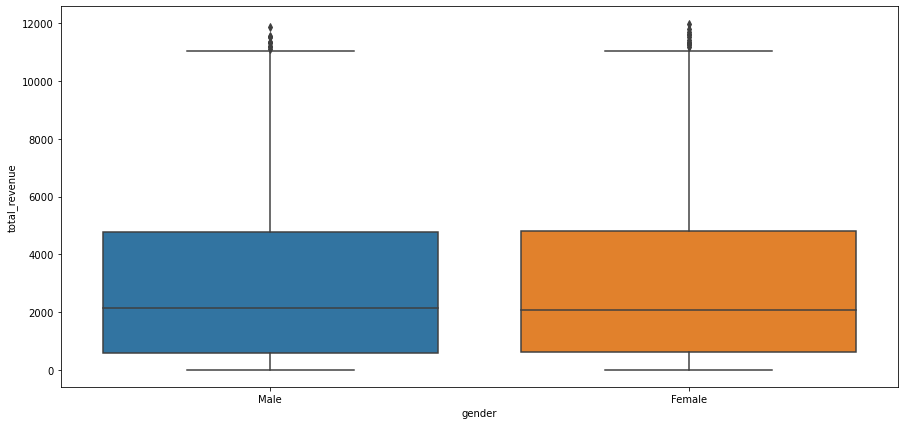

In [24]:
plt.figure(figsize = (15, 7))
sns.boxplot(x = "gender", y = "total_revenue", data = customer_data.sort_values('gender', ascending = False))

In [25]:
customer_data['churn_reason'].replace(np.nan, "None")

0                                None
1                                None
2       Competitor had better devices
3             Product dissatisfaction
4                 Network reliability
                    ...              
7038                             None
7039          Product dissatisfaction
7040                             None
7041                             None
7042                             None
Name: churn_reason, Length: 7043, dtype: object

## Age group of customers per gender analysis of the telecom company

<AxesSubplot:xlabel='gender', ylabel='age'>

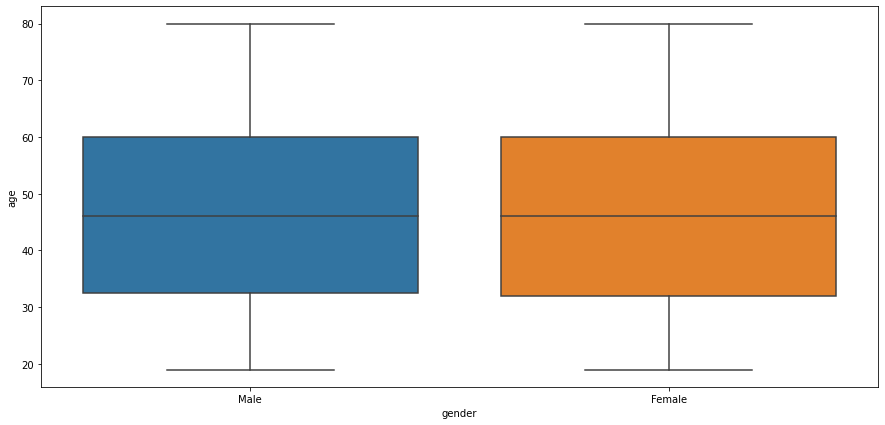

In [26]:
plt.figure(figsize = (15, 7))
sns.boxplot(x = "gender", y = "age", data = customer_data.sort_values('gender', ascending = False))

## Recharge plan analysis of customers (monthly, per year, two years) vs revenue growth 

<AxesSubplot:xlabel='contract', ylabel='total_revenue'>

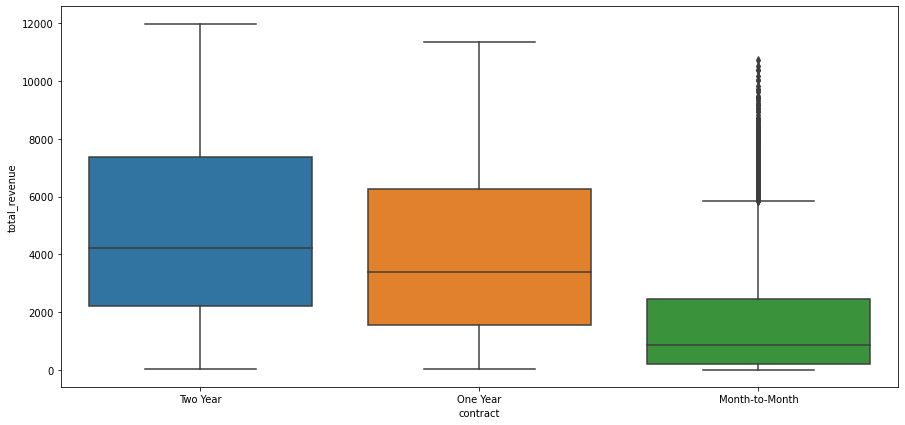

In [27]:
plt.figure(figsize = (15, 7))
sns.boxplot(x = "contract", y = "total_revenue", data = customer_data.sort_values('contract', ascending = False))

In [28]:
customer_data.describe()

age  number_of_dependents  number_of_referrals  \
count  7043.000000           7043.000000          7043.000000   
mean     46.509726              0.468692             1.951867   
std      16.750352              0.962802             3.001199   
min      19.000000              0.000000             0.000000   
25%      32.000000              0.000000             0.000000   
50%      46.000000              0.000000             0.000000   
75%      60.000000              0.000000             3.000000   
max      80.000000              9.000000            11.000000   

       tenure_in_months  avg_monthly_long_distance_charges  \
count       7043.000000                        6361.000000   
mean          32.386767                          25.420517   
std           24.542061                          14.200374   
min            1.000000                           1.010000   
25%            9.000000                          13.050000   
50%           29.000000                          25.690000   
75%           55.000000                          37.680000   
max           72.000000                          49.990000   

       avg_monthly_gb_download  monthly_charge  total_charges  total_refunds  \
count              5517.000000     7043.000000    7043.000000    7043.000000   
mean                 26.189958       63.596131    2280.381264       1.962182   
std                  19.586585       31.204743    2266.220462       7.902614   
min                   2.000000      -10.000000      18.800000       0.000000   
25%                  13.000000       30.400000     400.150000       0.000000   
50%                  21.000000       70.050000    1394.550000       0.000000   
75%                  30.000000       89.750000    3786.600000       0.000000   
max                  85.000000      118.750000    8684.800000      49.790000   

       total_extra_data_charges  total_long_distance_charges  total_revenue  
count               7043.000000                  7043.000000    7043.000000  
mean                   6.860713                   749.099262    3034.379056  
std                   25.104978                   846.660055    2865.204542  
min                    0.000000                     0.000000      21.360000  
25%                    0.000000                    70.545000     605.610000  
50%                    0.000000                   401.440000    2108.640000  
75%                    0.000000                  1191.100000    4801.145000  
max                  150.000000                  3564.720000   11979.340000

## Separating the continuous and categorical columns

In [29]:
continuous = [col for col in customer_data.columns if customer_data[col].dtype != "O"]
continuous

['age',
 'number_of_dependents',
 'number_of_referrals',
 'tenure_in_months',
 'avg_monthly_long_distance_charges',
 'avg_monthly_gb_download',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue']

In [30]:
categorical = [col for col in customer_data.columns if customer_data[col].dtype == "O"]
categorical

['gender',
 'married',
 'city',
 'phone_service',
 'multiple_lines',
 'internet_service',
 'internet_type',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'contract',
 'paperless_billing',
 'payment_method',
 'customer_status',
 'churn_category',
 'churn_reason']

In [31]:
categorical_df = customer_data[categorical]
categorical_df

gender married          city phone_service multiple_lines  \
0     Female     Yes  Frazier Park           Yes             No   
1       Male      No      Glendale           Yes            Yes   
2       Male      No    Costa Mesa           Yes             No   
3       Male     Yes      Martinez           Yes             No   
4     Female     Yes     Camarillo           Yes             No   
...      ...     ...           ...           ...            ...   
7038  Female      No       La Mesa           Yes             No   
7039    Male     Yes     Riverbank           Yes            Yes   
7040    Male      No           Elk           Yes             No   
7041    Male     Yes  Solana Beach           Yes             No   
7042    Male     Yes   Sierra City            No            NaN   

     internet_service internet_type online_security online_backup  \
0                 Yes         Cable              No           Yes   
1                 Yes         Cable              No            No   
2                 Yes   Fiber Optic              No            No   
3                 Yes   Fiber Optic              No           Yes   
4                 Yes   Fiber Optic              No            No   
...               ...           ...             ...           ...   
7038              Yes           DSL             Yes            No   
7039              Yes   Fiber Optic              No            No   
7040              Yes           DSL              No           Yes   
7041              Yes         Cable             Yes            No   
7042              Yes         Cable             Yes           Yes   

     device_protection_plan  ... streaming_tv streaming_movies  \
0                        No  ...          Yes               No   
1                        No  ...           No              Yes   
2                       Yes  ...           No               No   
3                       Yes  ...          Yes              Yes   
4                        No  ...          Yes               No   
...                     ...  ...          ...              ...   
7038                     No  ...           No               No   
7039                     No  ...           No              Yes   
7040                     No  ...           No               No   
7041                    Yes  ...           No              Yes   
7042                    Yes  ...          Yes              Yes   

     streaming_music unlimited_data        contract paperless_billing  \
0                 No            Yes        One Year               Yes   
1                Yes             No  Month-to-Month                No   
2                 No            Yes  Month-to-Month               Yes   
3                 No            Yes  Month-to-Month               Yes   
4                 No            Yes  Month-to-Month               Yes   
...              ...            ...             ...               ...   
7038             Yes            Yes        One Year                No   
7039             Yes            Yes  Month-to-Month               Yes   
7040              No            Yes  Month-to-Month               Yes   
7041             Yes            Yes        Two Year                No   
7042             Yes            Yes        Two Year                No   

       payment_method customer_status   churn_category  \
0         Credit Card          Stayed              NaN   
1         Credit Card          Stayed              NaN   
2     Bank Withdrawal         Churned       Competitor   
3     Bank Withdrawal         Churned  Dissatisfaction   
4         Credit Card         Churned  Dissatisfaction   
...               ...             ...              ...   
7038      Credit Card          Stayed              NaN   
7039  Bank Withdrawal         Churned  Dissatisfaction   
7040      Credit Card          Joined              NaN   
7041      Credit Card          Stayed              NaN   
7042  Bank Withdrawal          Stayed              NaN   

     

In [32]:
continuous_df = customer_data[continuous]

In [33]:
continuous_df.head()

age  number_of_dependents  number_of_referrals  tenure_in_months  \
0   37                     0                    2                 9   
1   46                     0                    0                 9   
2   50                     0                    0                 4   
3   78                     0                    1                13   
4   75                     0                    3                 3   

   avg_monthly_long_distance_charges  avg_monthly_gb_download  monthly_charge  \
0                              42.39                     16.0            65.6   
1                              10.69                     10.0            -4.0   
2                              33.65                     30.0            73.9   
3                              27.82                      4.0            98.0   
4                               7.38                     11.0            83.9   

   total_charges  total_refunds  total_extra_data_charges  \
0         593.30           0.00                         0   
1         542.40          38.33                        10   
2         280.85           0.00                         0   
3        1237.85           0.00                         0   
4         267.40           0.00                         0   

   total_long_distance_charges  total_revenue  
0                       381.51         974.81  
1                        96.21         610.28  
2                       134.60         415.45  
3                       361.66        1599.51  
4                        22.14         289.54

## Creating the EDA report 

In [34]:
from pandas_profiling import ProfileReport

In [35]:
customer_report  = ProfileReport(
    customer_data,
    title="Customer Report"  
)

customer_report.to_notebook_iframe()
customer_report.to_file("Telecom Customer Report.html")

## Correlation between columns

In [36]:
corelation = customer_data.corr()
corelation

age  number_of_dependents  \
age                                1.000000             -0.119000   
number_of_dependents              -0.119000              1.000000   
number_of_referrals               -0.025141              0.278003   
tenure_in_months                   0.009927              0.108237   
avg_monthly_long_distance_charges -0.020010             -0.002898   
avg_monthly_gb_download           -0.566518              0.300802   
monthly_charge                     0.134511             -0.125649   
total_charges                      0.059684              0.022535   
total_refunds                      0.024168              0.014023   
total_extra_data_charges           0.025036             -0.014436   
total_long_distance_charges        0.003065              0.068966   
total_revenue                      0.048265              0.038038   

                                   number_of_referrals  tenure_in_months  \
age                                          -0.025141          0.009927   
number_of_dependents                          0.278003          0.108237   
number_of_referrals                           1.000000          0.326975   
tenure_in_months                              0.326975          1.000000   
avg_monthly_long_distance_charges             0.001800          0.012713   
avg_monthly_gb_download                       0.080243          0.038173   
monthly_charge                                0.026301          0.239065   
total_charges                                 0.250378          0.826074   
total_refunds                                 0.024756          0.059021   
total_extra_data_charges                      0.000350          0.082266   
total_long_distance_charges                   0.216190          0.674149   
total_revenue                                 0.261853          0.853146   

                                   avg_monthly_long_distance_charges  \
age                                                        -0.020010   
number_of_dependents                                       -0.002898   
number_of_referrals                                         0.001800   
tenure_in_months                                            0.012713   
avg_monthly_long_distance_charges                           1.000000   
avg_monthly_gb_download                                     0.019047   
monthly_charge                                              0.019149   
total_charges                                               0.016946   
total_refunds                                              -0.026072   
total_extra_data_charges                                    0.021162   
total_long_distance_charges                                 0.548759   
total_revenue                                               0.173072   

                                   avg_monthly_gb_download  monthly_charge  \
age                                              -0.566518        0.134511   
number_of_dependents                              0.300802       -0.125649   
number_of_referrals                               0.080243        0.026301   
tenure_in_months                                  0.038173        0.239065   
avg_monthly_long_distance_charges                 0.019047        0.019149   
avg_monthly_gb_download                           1.000000       -0.017283   
monthly_charge                                   -0.017283        1.000000   
total_charges                                     0.031957        0.622810   
total_refunds                                    -0.011000        0.023963   
total_extra_data_charges                          0.015451        0.121238   
total_long_distance_charges                       0.024101        0.235685   
total_revenue                                     0.031922        0.563249   

                                   total_charges  total_refunds  \
age                                     0.059684       0.024168   
number_of_dependents                    0.022535       0.014023   


## Heatmap for corelations

<AxesSubplot:>

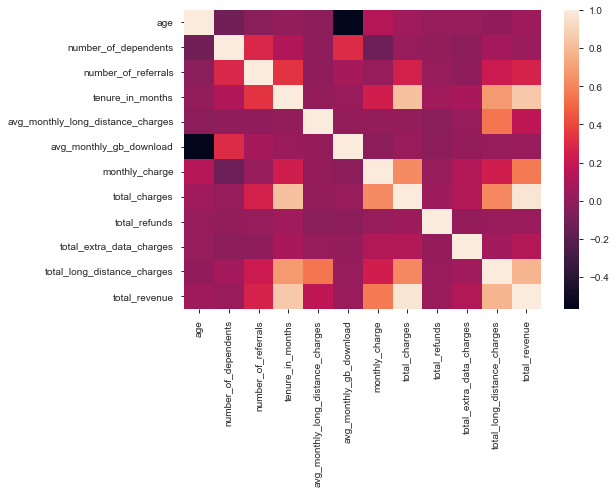

In [37]:
sns.heatmap(corelation)

In [38]:
categorical_df.isna().sum()

gender                       0
married                      0
city                         0
phone_service                0
multiple_lines             682
internet_service             0
internet_type             1526
online_security           1526
online_backup             1526
device_protection_plan    1526
premium_tech_support      1526
streaming_tv              1526
streaming_movies          1526
streaming_music           1526
unlimited_data            1526
contract                     0
paperless_billing            0
payment_method               0
customer_status              0
churn_category            5174
churn_reason              5174
dtype: int64

In [39]:
na_list = [
    'multiple_lines', 
    'internet_type', 
    'online_security',
    'online_backup', 
    'device_protection_plan',
    'premium_tech_support', 
    'streaming_tv', 
    'streaming_movies',
    'streaming_music',
    'unlimited_data', 
    'churn_category',
    'churn_reason'
]

In [40]:
for i in na_list:
    categorical_df[i].fillna("None", inplace = True)
    

In [41]:
categorical_df.isna().sum()

gender                    0
married                   0
city                      0
phone_service             0
multiple_lines            0
internet_service          0
internet_type             0
online_security           0
online_backup             0
device_protection_plan    0
premium_tech_support      0
streaming_tv              0
streaming_movies          0
streaming_music           0
unlimited_data            0
contract                  0
paperless_billing         0
payment_method            0
customer_status           0
churn_category            0
churn_reason              0
dtype: int64

In [42]:
for i in categorical_df.columns:
    print('{} has total: ""{}"" categories'.format(i, len(categorical_df[i].value_counts())))

gender has total: ""2"" categories
married has total: ""2"" categories
city has total: ""1106"" categories
phone_service has total: ""2"" categories
multiple_lines has total: ""3"" categories
internet_service has total: ""2"" categories
internet_type has total: ""4"" categories
online_security has total: ""3"" categories
online_backup has total: ""3"" categories
device_protection_plan has total: ""3"" categories
premium_tech_support has total: ""3"" categories
streaming_tv has total: ""3"" categories
streaming_movies has total: ""3"" categories
streaming_music has total: ""3"" categories
unlimited_data has total: ""3"" categories
contract has total: ""3"" categories
paperless_billing has total: ""2"" categories
payment_method has total: ""3"" categories
customer_status has total: ""3"" categories
churn_category has total: ""6"" categories
churn_reason has total: ""21"" categories


In [43]:
categorical_df['city'] = categorical_df['city'].str.replace(" ", "_") 

In [44]:
categorical_df['city'].head(50)

0            Frazier_Park
1                Glendale
2              Costa_Mesa
3                Martinez
4               Camarillo
5                Midpines
6                  Lompoc
7                    Napa
8             Simi_Valley
9                Sheridan
10        Rancho_Santa_Fe
11              Sunnyvale
12               Antelope
13                La_Mesa
14             Los_Olivos
15               Woodlake
16    Point_Reyes_Station
17             San_Marcos
18              Daly_City
19            Morgan_Hill
20               Ahwahnee
21          Carnelian_Bay
22                Alpaugh
23                 Keeler
24                 Korbel
25       Palomar_Mountain
26                Parlier
27                Modesto
28             Glen_Ellen
29                 Eureka
30             Moss_Beach
31            Los_Angeles
32            Los_Angeles
33               Calexico
34                Redding
35             San_Martin
36               Stockton
37            Los_Angeles
38        Hu

## Creating the dummy variables for cities 

In [45]:
cities = pd.get_dummies(categorical_df['city'], drop_first = True)
cities.head()

Acton  Adelanto  Adin  Agoura_Hills  Aguanga  Ahwahnee  Alameda  Alamo  \
0      0         0     0             0        0         0        0      0   
1      0         0     0             0        0         0        0      0   
2      0         0     0             0        0         0        0      0   
3      0         0     0             0        0         0        0      0   
4      0         0     0             0        0         0        0      0   

   Albany  Albion  ...  Wrightwood  Yermo  Yorba_Linda  Yorkville  Yountville  \
0       0       0  ...           0      0            0          0           0   
1       0       0  ...           0      0            0          0           0   
2       0       0  ...           0      0            0          0           0   
3       0       0  ...           0      0            0          0           0   
4       0       0  ...           0      0            0          0           0   

   Yreka  Yuba_City  Yucaipa  Yucca_Valley  Zenia  
0      0          0        0             0      0  
1      0          0        0             0      0  
2      0          0        0             0      0  
3      0          0        0             0      0  
4      0          0        0             0      0  

[5 rows x 1105 columns]

In [46]:
categorical_df['contract'].unique()

array(['One Year', 'Month-to-Month', 'Two Year'], dtype=object)

In [47]:
categorical_df['contract'] = categorical_df['contract'].str.replace("One Year", "365")
categorical_df['contract'] = categorical_df['contract'].str.replace("Month-to-Month", "28")
categorical_df['contract'] = categorical_df['contract'].str.replace("Two Year", "730")

In [48]:
continuous_df['contract_period_in_days'] = categorical_df['contract'].astype("int64")

In [49]:
continuous_df['contract_period_in_days'].head()

0    365
1     28
2     28
3     28
4     28
Name: contract_period_in_days, dtype: int64

In [50]:
categorical_df.drop('contract', axis = 1, inplace = True)

In [51]:
categorical_df.columns

Index(['gender', 'married', 'city', 'phone_service', 'multiple_lines',
       'internet_service', 'internet_type', 'online_security', 'online_backup',
       'device_protection_plan', 'premium_tech_support', 'streaming_tv',
       'streaming_movies', 'streaming_music', 'unlimited_data',
       'paperless_billing', 'payment_method', 'customer_status',
       'churn_category', 'churn_reason'],
      dtype='object')

In [52]:
categorical_df['unlimited_data'] = categorical_df['unlimited_data'].str.replace("Yes", "1")
categorical_df['unlimited_data'] = categorical_df['unlimited_data'].str.replace("No", "0")
categorical_df['unlimited_data'] = categorical_df['unlimited_data'].str.replace("None", "0")

In [53]:
categorical_df['unlimited_data'].unique()

array(['1', '0', '0ne'], dtype=object)

In [54]:
categorical_df['unlimited_data'] = categorical_df['unlimited_data'].str.replace("0ne","0")

In [55]:
categorical_df['unlimited_data'].unique()

array(['1', '0'], dtype=object)

In [56]:
continuous_df['UL_data'] = categorical_df['unlimited_data'].astype("int64")

In [57]:
categorical_df.drop("unlimited_data", axis = 1, inplace = True)

In [58]:
continuous_df.columns

Index(['age', 'number_of_dependents', 'number_of_referrals',
       'tenure_in_months', 'avg_monthly_long_distance_charges',
       'avg_monthly_gb_download', 'monthly_charge', 'total_charges',
       'total_refunds', 'total_extra_data_charges',
       'total_long_distance_charges', 'total_revenue',
       'contract_period_in_days', 'UL_data'],
      dtype='object')

In [59]:
categorical_df.columns

Index(['gender', 'married', 'city', 'phone_service', 'multiple_lines',
       'internet_service', 'internet_type', 'online_security', 'online_backup',
       'device_protection_plan', 'premium_tech_support', 'streaming_tv',
       'streaming_movies', 'streaming_music', 'paperless_billing',
       'payment_method', 'customer_status', 'churn_category', 'churn_reason'],
      dtype='object')

In [60]:
imp_list = ['churn_category', "churn_reason", 'customer_status', 'unlimited_data']

In [61]:
categorical_df['churn_reason'].unique()

array(['None', 'Competitor had better devices', 'Product dissatisfaction',
       'Network reliability', 'Limited range of services',
       'Competitor made better offer', "Don't know",
       'Long distance charges', 'Attitude of service provider',
       'Attitude of support person',
       'Competitor offered higher download speeds',
       'Competitor offered more data',
       'Lack of affordable download/upload speed', 'Deceased', 'Moved',
       'Service dissatisfaction', 'Price too high',
       'Lack of self-service on Website',
       'Poor expertise of online support', 'Extra data charges',
       'Poor expertise of phone support'], dtype=object)

In [62]:
categorical_df['customer_status'].unique()

array(['Stayed', 'Churned', 'Joined'], dtype=object)

## Fetching and encoding the reasons why customers left the company 

In [63]:
reasons = pd.get_dummies(categorical_df['churn_reason'], drop_first = True)

In [64]:
reasons.head()

Attitude of support person  Competitor had better devices  \
0                           0                              0   
1                           0                              0   
2                           0                              1   
3                           0                              0   
4                           0                              0   

   Competitor made better offer  Competitor offered higher download speeds  \
0                             0                                          0   
1                             0                                          0   
2                             0                                          0   
3                             0                                          0   
4                             0                                          0   

   Competitor offered more data  Deceased  Don't know  Extra data charges  \
0                             0         0           0                   0   
1                             0         0           0                   0   
2                             0         0           0                   0   
3                             0         0           0                   0   
4                             0         0           0                   0   

   Lack of affordable download/upload speed  Lack of self-service on Website  \
0                                         0                                0   
1                                         0                                0   
2                                         0                                0   
3                                         0                                0   
4                                         0                                0   

   Limited range of services  Long distance charges  Moved  \
0                          0                      0      0   
1                          0                      0      0   
2                          0                      0      0   
3                          0                      0      0   
4                          0                      0      0   

   Network reliability  None  Poor expertise of online support  \
0                    0     1                                 0   
1                    0     1                                 0   
2                    0     0                                 0   
3                    0     0                                 0   
4                    1     0                                 0   

   Poor expertise of phone support  Price too high  Product dissatisfaction  \
0                                0               0                        0   
1                                0               0                        0   
2                                0               0                        0   
3                                0               0                        1   
4                                0               0                        0   

   Service dissatisfaction  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0

In [65]:
continuous_df.head()

age  number_of_dependents  number_of_referrals  tenure_in_months  \
0   37                     0                    2                 9   
1   46                     0                    0                 9   
2   50                     0                    0                 4   
3   78                     0                    1                13   
4   75                     0                    3                 3   

   avg_monthly_long_distance_charges  avg_monthly_gb_download  monthly_charge  \
0                              42.39                     16.0            65.6   
1                              10.69                     10.0            -4.0   
2                              33.65                     30.0            73.9   
3                              27.82                      4.0            98.0   
4                               7.38                     11.0            83.9   

   total_charges  total_refunds  total_extra_data_charges  \
0         593.30           0.00                         0   
1         542.40          38.33                        10   
2         280.85           0.00                         0   
3        1237.85           0.00                         0   
4         267.40           0.00                         0   

   total_long_distance_charges  total_revenue  contract_period_in_days  \
0                       381.51         974.81                      365   
1                        96.21         610.28                       28   
2                       134.60         415.45                       28   
3                       361.66        1599.51                       28   
4                        22.14         289.54                       28   

   UL_data  
0        1  
1        0  
2        1  
3        1  
4        1

## Creating a new dataframe that contains imortant columns for analysis

In [66]:
process_df = pd.concat([continuous_df, cities], axis = 1)

In [67]:
process_df.dtypes

age                                    int64
number_of_dependents                   int64
number_of_referrals                    int64
tenure_in_months                       int64
avg_monthly_long_distance_charges    float64
                                      ...   
Yreka                                  uint8
Yuba_City                              uint8
Yucaipa                                uint8
Yucca_Valley                           uint8
Zenia                                  uint8
Length: 1119, dtype: object

### Replacing the Nan values with zero

In [68]:
process_df = process_df.replace(np.nan, 0)

## Checking for the rows and columns containing infinity values (if they exist)

In [69]:
# printing row index with infinity
print("printing row index with infinity ")
 
r = process_df.index[np.isinf(process_df).any(1)]
print(r)

printing row index with infinity 
Int64Index([], dtype='int64')


In [70]:
print("printing column name where infinity is present")
col_name = process_df.columns.to_series()[np.isinf(process_df).any()]
print(col_name)

printing column name where infinity is present
Series([], dtype: object)


In [71]:
X = process_df
X.head()

age  number_of_dependents  number_of_referrals  tenure_in_months  \
0   37                     0                    2                 9   
1   46                     0                    0                 9   
2   50                     0                    0                 4   
3   78                     0                    1                13   
4   75                     0                    3                 3   

   avg_monthly_long_distance_charges  avg_monthly_gb_download  monthly_charge  \
0                              42.39                     16.0            65.6   
1                              10.69                     10.0            -4.0   
2                              33.65                     30.0            73.9   
3                              27.82                      4.0            98.0   
4                               7.38                     11.0            83.9   

   total_charges  total_refunds  total_extra_data_charges  ...  Wrightwood  \
0         593.30           0.00                         0  ...           0   
1         542.40          38.33                        10  ...           0   
2         280.85           0.00                         0  ...           0   
3        1237.85           0.00                         0  ...           0   
4         267.40           0.00                         0  ...           0   

   Yermo  Yorba_Linda  Yorkville  Yountville  Yreka  Yuba_City  Yucaipa  \
0      0            0          0           0      0          0        0   
1      0            0          0           0      0          0        0   
2      0            0          0           0      0          0        0   
3      0            0          0           0      0          0        0   
4      0            0          0           0      0          0        0   

   Yucca_Valley  Zenia  
0             0      0  
1             0      0  
2             0      0  
3             0      0  
4             0      0  

[5 rows x 1119 columns]

In [72]:
X.isna().sum()

age                                  0
number_of_dependents                 0
number_of_referrals                  0
tenure_in_months                     0
avg_monthly_long_distance_charges    0
                                    ..
Yreka                                0
Yuba_City                            0
Yucaipa                              0
Yucca_Valley                         0
Zenia                                0
Length: 1119, dtype: int64

In [73]:
X.dropna()

age  number_of_dependents  number_of_referrals  tenure_in_months  \
0      37                     0                    2                 9   
1      46                     0                    0                 9   
2      50                     0                    0                 4   
3      78                     0                    1                13   
4      75                     0                    3                 3   
...   ...                   ...                  ...               ...   
7038   20                     0                    0                13   
7039   40                     0                    1                22   
7040   22                     0                    0                 2   
7041   21                     0                    5                67   
7042   36                     0                    1                63   

      avg_monthly_long_distance_charges  avg_monthly_gb_download  \
0                                 42.39                     16.0   
1                                 10.69                     10.0   
2                                 33.65                     30.0   
3                                 27.82                      4.0   
4                                  7.38                     11.0   
...                                 ...                      ...   
7038                              46.68                     59.0   
7039                              16.20                     17.0   
7040                              18.62                     51.0   
7041                               2.12                     58.0   
7042                               0.00                      5.0   

      monthly_charge  total_charges  total_refunds  total_extra_data_charges  \
0              65.60         593.30           0.00                         0   
1              -4.00         542.40          38.33                        10   
2              73.90         280.85           0.00                         0   
3              98.00        1237.85           0.00                         0   
4              83.90         267.40           0.00                         0   
...              ...            ...            ...                       ...   
7038           55.15         742.90           0.00                         0   
7039           85.10        1873.70           0.00                         0   
7040           50.30          92.75           0.00                         0   
7041           67.85        4627.65           0.00                         0   
7042           59.00        3707.60           0.00                         0   

      ...  Wrightwood  Yermo  Yorba_Linda  Yorkville  Yountville  Yreka  \
0     ...           0      0            0          0           0      0   
1     ...           0      0            0          0           0      0   
2     ...           0      0            0          0           0      0   
3     ...           0      0            0          0           0      0   
4     ...           0      0            0          0           0      0   
...   ...         ...    ...          ...        ...         ...    ...   
7038  ...           0      0            0          0           0      0   
7039  ...           0      0            0          0           0      0   
7040  ...           0      0            0          0           0      0   
7041  ...           0      0            0          0           0      0   
7042  ...           0      0            0          0           0      0   

      Yuba_City  Yucaipa  Yucca_Valley  Zenia  
0             0        0             0      0  
1             0        0             0      0  
2             0        0             0      0  
3             0        0             0      0  
4             0        0             0      0  
...         ...      ...           ...    ...  
7038          0        0             0      0  
7039          0        0             0      0  
7040  

## Taking out three important reasons and storing them in dependent variables for prediction and analysis

In [74]:
y1 = reasons['Competitor offered higher download speeds']
y2 = reasons['Lack of affordable download/upload speed']
y3 = reasons['Extra data charges']

## Importing the necessary algorithms and model selection functions 

### Splitting the training and test data for reason no 1: 
#### 'Competitor offered higher download speeds'
#### implementing the necessary algorithms for the same

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y1) 

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle

In [77]:
def predict(ml_model, dump):
    model = ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    
    r2_score = metrics.r2_score(y_test,y_prediction)
    
    print('r2 score: {}'.format(r2_score))
    print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_prediction))
    print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_prediction))
    print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file = open("model_1.pkl",'wb')
        pickle.dump(model,file)
    

Training score : 0.2527357002871754
predictions are: 
 [0.01726714 0.00902432 0.00923105 ... 0.00841893 0.09823105 0.0074877 ]


r2 score: -0.3098780344536747
Mean Absolute Error: 0.03965042489582585
Mean Squared Error: 0.0176085343010817
Root Mean Squared Error: 0.13269715257337553


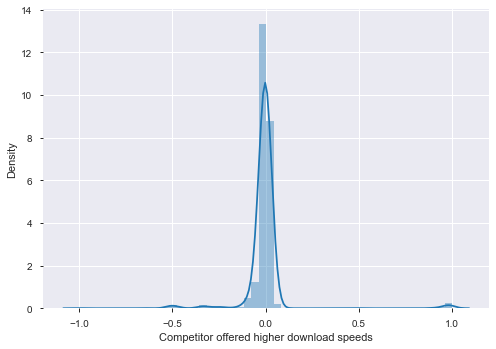

In [78]:
predict(LinearRegression(), 0)

In [79]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

Training score : 1.0
predictions are: 
 [0. 0. 0. ... 0. 1. 0.]


r2 score: -0.9853914795624641
Mean Absolute Error: 0.02668938103350369
Mean Squared Error: 0.02668938103350369
Root Mean Squared Error: 0.16336884964246914


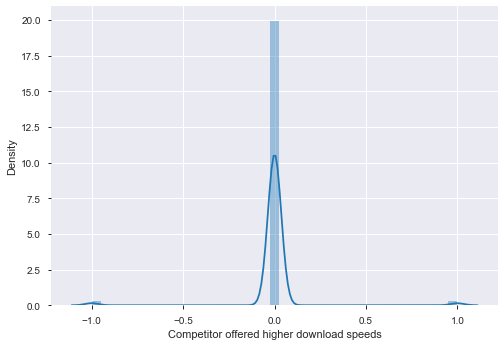

In [80]:
predict(DecisionTreeRegressor(), 1)

Training score : 0.8172788129081828
predictions are: 
 [0.   0.   0.   ... 0.   0.65 0.  ]


r2 score: -0.3811270221646519
Mean Absolute Error: 0.02883021010789324
Mean Squared Error: 0.018566325951164114
Root Mean Squared Error: 0.13625830598963173


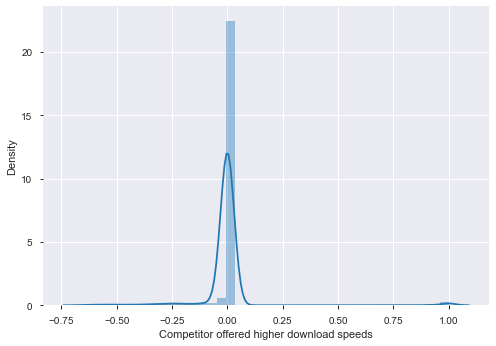

In [81]:
predict(RandomForestRegressor(), 0)

### Splitting the training and test data for reason no 2: 
#### 'Lack of affordable download/upload speed'
#### implementing the necessary algorithms for the same

In [82]:
def predict(ml_model, dump):
    model = ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    
    r2_score = metrics.r2_score(y_test,y_prediction)
    
    print('r2 score: {}'.format(r2_score))
    print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_prediction))
    print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_prediction))
    print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file = open("model_2.pkl",'wb')
        pickle.dump(model,file)
    

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y2) 

Training score : 0.19749480573643652
predictions are: 
 [ 0.00769418  0.00438365  0.01147495 ...  0.0026263  -0.00424949
  0.00039666]


r2 score: -0.28247799279387875
Mean Absolute Error: 0.010776626727965297
Mean Squared Error: 0.0029064507103577658
Root Mean Squared Error: 0.05391150814397391


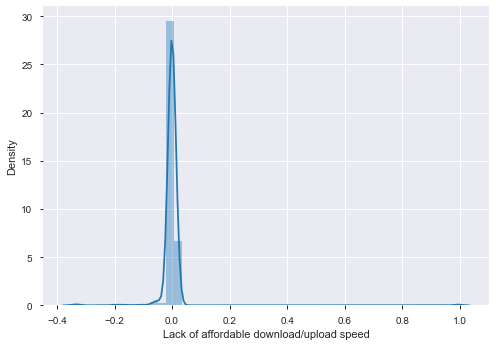

In [84]:
predict(LinearRegression(), 0)

Training score : 1.0
predictions are: 
 [0. 0. 0. ... 0. 0. 0.]


r2 score: -1.7562606715993159
Mean Absolute Error: 0.006246450880181715
Mean Squared Error: 0.006246450880181715
Root Mean Squared Error: 0.07903449171204756


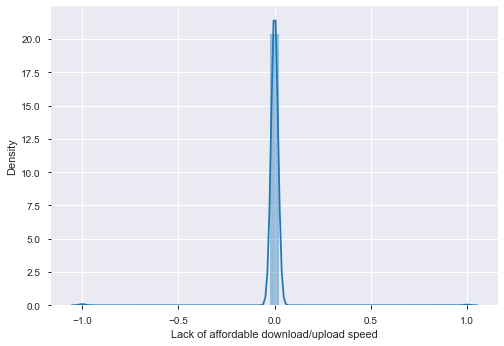

In [85]:
predict(DecisionTreeRegressor(), 0)

Training score : 0.7879098583304063
predictions are: 
 [0. 0. 0. ... 0. 0. 0.]


r2 score: -0.6230366249288553
Mean Absolute Error: 0.006394094264622375
Mean Squared Error: 0.003678250993753549
Root Mean Squared Error: 0.06064858608206418


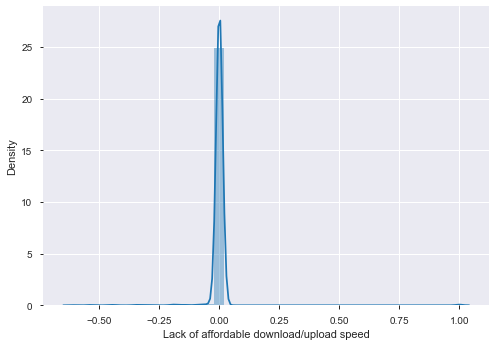

In [86]:
predict(RandomForestRegressor(), 1)

### Splitting the training and test data for reason no 2: 
#### 'Extra data charges'
#### implementing the necessary algorithms for the same

In [87]:
def predict(ml_model, dump):
    model = ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    
    r2_score = metrics.r2_score(y_test,y_prediction)
    
    print('r2 score: {}'.format(r2_score))
    print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_prediction))
    print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_prediction))
    print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file = open("model_3.pkl",'wb')
        pickle.dump(model,file)
    

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y3) 

Training score : 0.16348226458317738
predictions are: 
 [ 0.00768518 -0.00852564  0.0011358  ...  0.00541038 -0.006922
  0.01169388]


r2 score: -0.28317920990984446
Mean Absolute Error: 0.014083895566060997
Mean Squared Error: 0.004357094444347921
Root Mean Squared Error: 0.0660082907243319


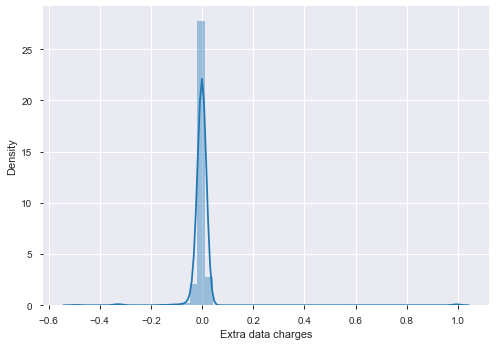

In [89]:
predict(LinearRegression(), 0)

Training score : 1.0
predictions are: 
 [0 0 0 ... 0 0 0]


r2 score: -2.344729344729343
Mean Absolute Error: 0.8767745599091425
Mean Squared Error: 0.011357183418512209
Root Mean Squared Error: 0.10657008688422943


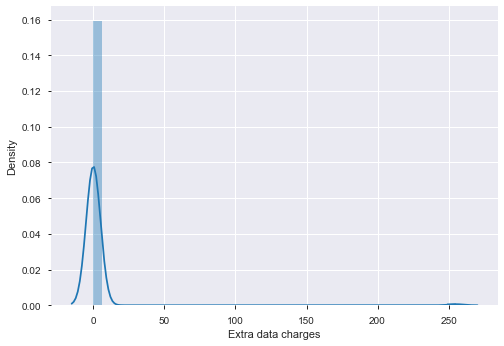

In [90]:
predict(DecisionTreeClassifier(), 0)

Training score : 1.0
predictions are: 
 [0 0 0 ... 0 0 0]


r2 score: -0.0034188034188029626
Mean Absolute Error: 0.868824531516184
Mean Squared Error: 0.0034071550255536627
Root Mean Squared Error: 0.0583708405417779


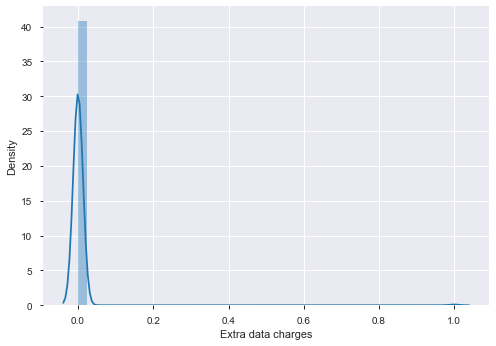

In [91]:
predict(RandomForestClassifier(), 1)

### Conclusion:

#### The analysis of the whole dataset with respect to some parameters says that customers who left the telecom service show a very close similarity for the three reasons that we analyzed. When we plot the distribution of the reasons and predictions then we can say that customers are likely to show disagreements from companies that have
#### 1. A high extra data charges
#### 2. Slower download and upload speeds 
#### 3. Competitor company preoviding a better sevice. 
### Best models:
#### For the reason 1 analysis: The Decision Tree Regressor model is the best fit model as it gives the minimum errors as well as very high accuracy.
#### For the reason 2 analysis: Decision Tree Regressor as well as Random Forest Regressor both show the optimum growth towards the predictive analysis as the training scores and evaluation metrics are giving desireable insight.
#### For the reason 3 analysis: Random Forest Classofoer and Decision Tree classifier are the best fit models due to their high accuracy and low error values in evaluation metrics.